In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
results = pd.read_csv('data/tournament_training_results.csv')

def n_hits(game):
    f = open(f'data/game_logs/game_{game}_log.csv', 'r')
    hits = 0
    for l in f.readlines():
        for s in l.split('/'):
            if '25' in s:
                hits += 1
    return hits


In [3]:
hits = [n_hits(i) for i in range(len(results.index[:724]))]
hits_df = pd.DataFrame(hits,columns=['hits'])
hits_df['group'] = hits_df.index // n
hits_avg = hits_df.groupby('group').median()

plt.plot(range(len(hits_avg)), hits_avg)

NameError: name 'n' is not defined

In [ ]:
plt.plot(range(len(results)), results['plys'])

In [92]:
n = 10000
results = pd.read_csv('data/tournament_training_results.csv')

results2 = results.copy()
results2['group'] = results2.index // n

In [93]:
results2

,game,avg_loss,final_loss,group
0,0,0.003906,0.093750,0
1,1,0.001411,0.087506,0
2,2,0.001973,0.098649,0
3,3,0.003856,0.092551,0
4,4,0.001900,0.087422,0
...,...,...,...,...
217917,217917,0.000362,0.001835,21
217918,217918,0.001600,0.055450,21
217919,217919,0.005373,0.247197,21
217920,217920,0.001315,0.053534,21


In [104]:
grouped_results = results2.groupby('group').mean()

In [105]:
grouped_results

,game,avg_loss,final_loss
group,,,
0,4999.5,0.003057,0.079492
1,14999.5,0.002838,0.072466
2,24999.5,0.002721,0.062833
3,34999.5,0.002799,0.063267
4,44999.5,0.002821,0.064747
5,54999.5,0.002780,0.064855
6,64999.5,0.002790,0.065326
7,74999.5,0.002763,0.064275
8,84999.5,0.002768,0.064434


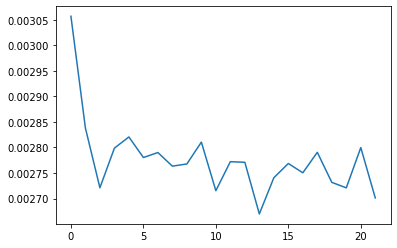

In [106]:
plt.plot(range(len(grouped_results)), grouped_results['avg_loss'])

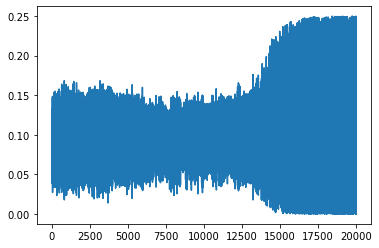

In [107]:
plt.plot(range(20000), results2['final_loss'][:20000])

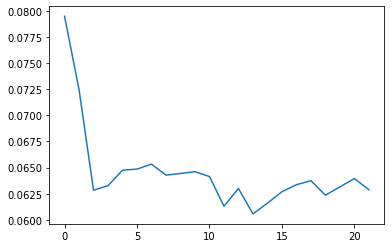

In [108]:
plt.plot(range(len(grouped_results)), grouped_results['final_loss'])

In [111]:
np.array([2,1,-1,-2]) @ np.array([0.5,0,0,0.5])

0.0